In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'
import numpy as np
import cv2 as cv
from pathlib import Path
import pandas as pd
# pd.set_option("display.max_colwidth", -1)
import plot_utils as plot
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Using TensorFlow backend.


In [4]:
COLOR_RED = (255, 0, 0)
COLOR_GREEN = (0, 255, 0)
COLOR_BLUE = (0, 0, 255)

def read_image(path):
    return cv.imread(str(path), cv.IMREAD_COLOR)

def plot_square(img, center, size):
    copy = img.copy()
    x, y = center
    half = size // 2
    top_left = (x-half, y-half)
    bottom_right = (x+half, y+half)
    cv.rectangle(copy, top_left, bottom_right, COLOR_GREEN, 3)
    cv.line(copy, (x-150, 600), (x+150, 600), COLOR_BLUE, 5)
    return copy

def get_crops(img, size, start, offset, step_size):
    start_x, start_y = start
    offset_x, offset_y = offset
    steps_x = offset_x // step_size
    steps_y = offset_y // step_size
    y, x = img.shape[:2]
    
    if start_x + size + offset_x > x or start_y + size + offset_y > y:
        print('Crop will overflow image')
        return np.array([])
    
    crops = []
    for step_x in range(steps_x):
        for step_y in range(steps_y):
            start_crop_y = start_y + step_y * step_size
            end_crop_y = start_crop_y + size
            start_crop_x = start_x + step_x * step_size
            end_crop_x  = start_crop_x + size
            crop = img[start_crop_y:end_crop_y, start_crop_x:end_crop_x]
            crops.append(crop)
    return crops

def get_center(img):
    y, x = img.shape[:2]
    return x // 2, y // 2


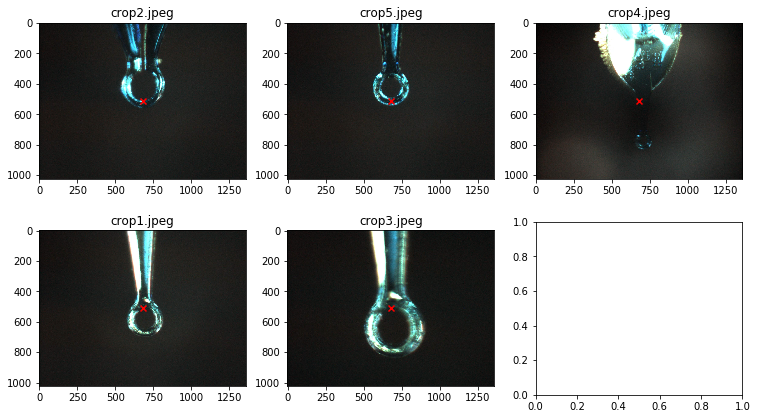

In [5]:
BASE_DIR = Path('/data/staff/common/ML-crystals/classification')
crop_bases = [(read_image(fp), fp.name) for fp in BASE_DIR.glob('crop*.jpeg')]
images, titles = zip(*crop_bases)
fig = plot.image_grid(images ,titles, max_cols=3)
# fig.savefig('classification_empty.png')
# print(fig)

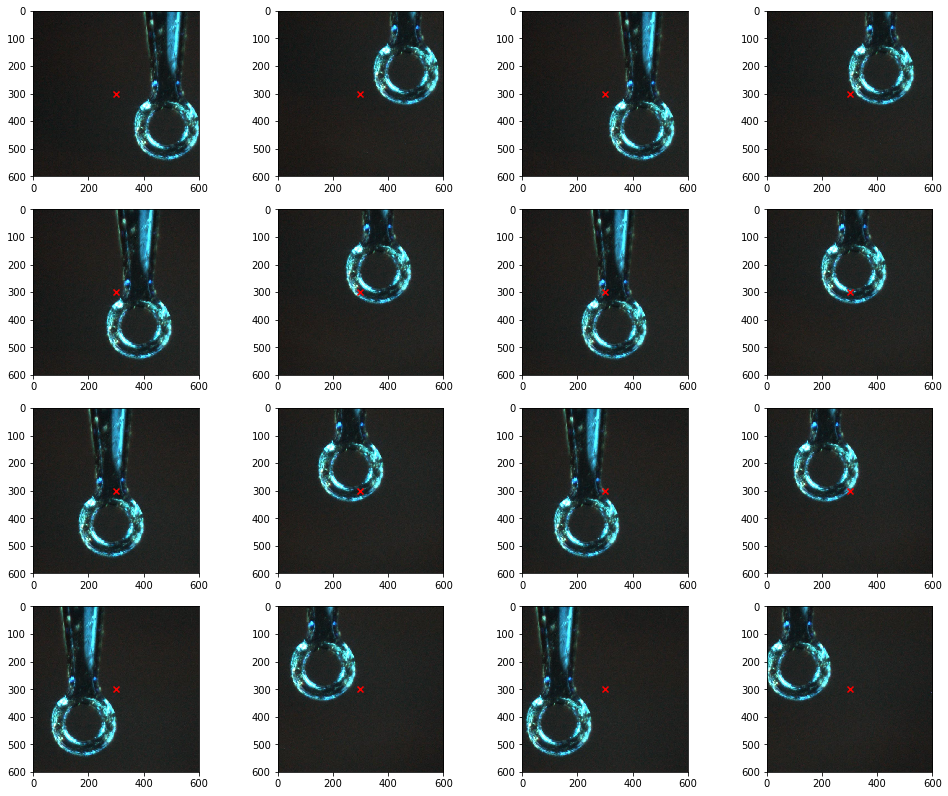

In [8]:
a = get_crops(crop_bases[1][0], *params[crop_bases[1][1]])
plot.image_grid(a[::100]);

In [29]:
from itertools import chain
from PIL import Image
params = {'crop2.jpeg': (600, (200, 0), (400, 400), 10),
         'crop1.jpeg': (600, (200, 100), (400, 300), 10),
         'crop3.jpeg': (600, (200, 0), (400, 400), 10),
         'crop5.jpeg': (600, (200, 0), (400, 400), 10),
         'crop4.jpeg': (400, (400, 400), (300, 220), 10)}

df = pd.DataFrame()
for group, images in {title: get_crops(img, *params[title]) for img, title in crop_bases}.items():
    print(group, len(images))
    df = pd.concat([df, pd.DataFrame({'group': [group[:-5]] * len(images), 'img': images})], ignore_index=True)

crop2.jpeg 1600
crop5.jpeg 1600
crop4.jpeg 660
crop1.jpeg 1200
crop3.jpeg 1600


In [35]:
groups, filenames = [], []
for idx, row in df.iterrows():
    fp = f"{BASE_DIR}/empty/{str(idx).zfill(4)}.jpeg"
    groups.append(row['group'])
    filenames.append(fp)
    Image.fromarray(cv.resize(cv.cvtColor(row['img'], cv.COLOR_BGR2GRAY), (256, 256)), mode='L').save(fp)

In [34]:
df_info = pd.DataFrame({'group': groups, 'filename': filenames})
df_info.to_csv('/data/staff/common/ML-crystals/csv/empty_augmented.csv', index=False)